# -------------------------------Big Data Mart Sales Problem---------------------------------------
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

# --------------------------------------------Purpose of Study-----------------------------------------

1. Develope Predictive Model to Predict "Item_Outlet_Sales".
    - Target feature is Item_Outlet_Sales, rest are required for model developement
    - Understand the properties of products and stores which play a key role in increasing the sales of their products.
    - Understand most sold items, outlet and other properties

# ---------------------------------------Loading Libraries----------------------------------------------

In [95]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler  

In [63]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [11]:
# Reading training data
df = pd.read_csv('bigdatamart_Train.csv')

In [104]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## 1. Getting to know data

### 1.1 Overall Data Analysis

In [12]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (8523, 12)


In [13]:
# Getting to know data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [15]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6295,FDZ12,9.170,Low Fat,0.103398,Baking Goods,143.9470,OUT018,2009,Medium,Tier 3,Supermarket Type2,2576.6460
6937,FDA31,7.100,Low Fat,0.110634,Fruits and Vegetables,173.8080,OUT017,2007,NaN,Tier 2,Supermarket Type1,1211.7560
5371,FDC11,20.500,Low Fat,0.142370,Starchy Foods,90.6172,OUT018,2009,Medium,Tier 3,Supermarket Type2,1427.4752
1243,DRG11,6.385,Low Fat,0.000000,Hard Drinks,108.9596,OUT046,1997,Small,Tier 1,Supermarket Type1,1186.4556
6533,NCT29,12.600,Low Fat,0.064111,Health and Hygiene,122.3414,OUT046,1997,Small,Tier 1,Supermarket Type1,243.6828


In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Conclusions - 
1. There are total 12 columns describing below properties
    - Item_Identifier - It is type of item/product in store (Categorical)
    - Item_Weight - Weight of product (Continuous)
    - Item_Fat_Content - Item fat content, i.e. health content (Categorical)
    - Item_Visibility - Visibility of item (Continuous)
    - Item_Type - Type of item e.g. Baking Goods, Seafood, Breads etc. (Categorical)
    - Item_MRP - cost of product (Continuous)
    - Outlet_Identifier - outlet name (Categorical)
    - Outlet_Establishment_Year - outlet establishment year (Date)
    - Outlet_Size - size of outlet (Categorical)
    - Outlet_Location_Type - outlet location type (Categorical)
    - Outlet_Type - type of outlet (Categorical)
    - Item_Outlet_Sales - Item outlet sales of that product (Continuous)
2. Total ~58% features, describing item properties (7/12)
3. Total ~42% features, describing outlet properties (5/12)
4. Target variable is "Outlet Sales", it is continuous

### 1.2 Getting to know more about data type

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 1.3 Gettting to Know Five Number Summery for Continuous variable

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Conclusion - 
1. In item weight total 8523 - 7060 = 1463 Values are missinh
2. We got, first and third quartile values for numbers
3. Average Sale of Outlet is 2181 (mean-As outliers may be present)
4. Average Sale of Outlet is 1794 (median-To treat outliers)

### 1.4 Gettting to Know about Categorical Variable

In [19]:
df.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### Conclusion - 
1. Missing Values
    - There are 8523 - 6113 = 2410 missing values in Outlet_size feature.
2. About Data
    - There are total 1559 items in Item_Identifier
    - There are 5 categories in "Item_Fat_Content"
    - There are 16 categories in "Item_Type"
    - There are 10 categories in "Outlet_Identifier"
    - There are 3 categories in "Outlet_Size"
    - There are 3 categories in "Outlet_Location_Type"
    - There are 4 categories in "Outlet_Type".
3. Frequency with number of occurances
    - 5089 products with Low Fat category
    - 1232 products with Fruits and Vegetables
    - 935 outlets with OUT027 as identifier
    - 2793 outlets are of medium size
    - 3350 outlets located in Tier 3 zone
    - 5577 outlets are of Supermarket Type1

### 1.5 Getting to Know About Missing Values

In [20]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 3873 missing values in dataset


In [21]:
# Feature Wise missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), 'missing values')

print('\n')
for feature in features_with_na:
    print(f'Out of {df[feature].size}, {feature} has \033[1m {df[feature].isnull().sum()} \033[0;0m missing values.')

Item_Weight 0.1717 missing values
Outlet_Size 0.2828 missing values


Out of 8523, Item_Weight has  1463  missing values.
Out of 8523, Outlet_Size has  2410  missing values.


### Conclusion - 
1. There are total 3893 missing values in dataset
    - 1463 Belongs to Item_Weight (Total 17.17 %)
    - 2410 Belongs to Outlet_Size (Total 28.28 %)
2. Before removing outliers by mean/median imputation
    - effect of these values on outlet sales
3. If any correlation present, then we will handle with median imputation technique.

# 2. EDA

### 2.1 Seperating Data as categorical and Numerica

In [23]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [24]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [25]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### 2.2 Effect of features with missing values on "Item_Outlet_Sales"

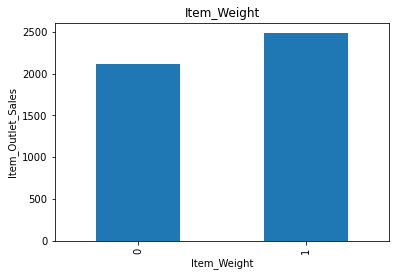

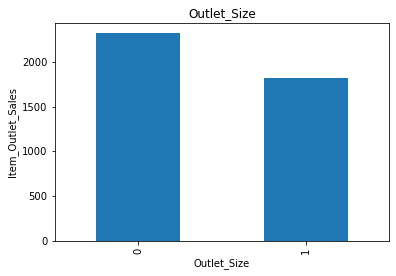

In [26]:
# Checking relation with bar plot
for feature in ['Item_Weight', 'Outlet_Size']:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Sale Price where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].mean().plot.bar()
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

### Conclusion - 
1. From above figure it is clear that, there is increase in sales if item weight is not given
2. Also increase in sales if "Outlet_Size" present.

It it better to consider these values for calculating sales, as weight is inversly proportional and Outlet_Size is directly proportional

<Figure size 6000x6000 with 0 Axes>

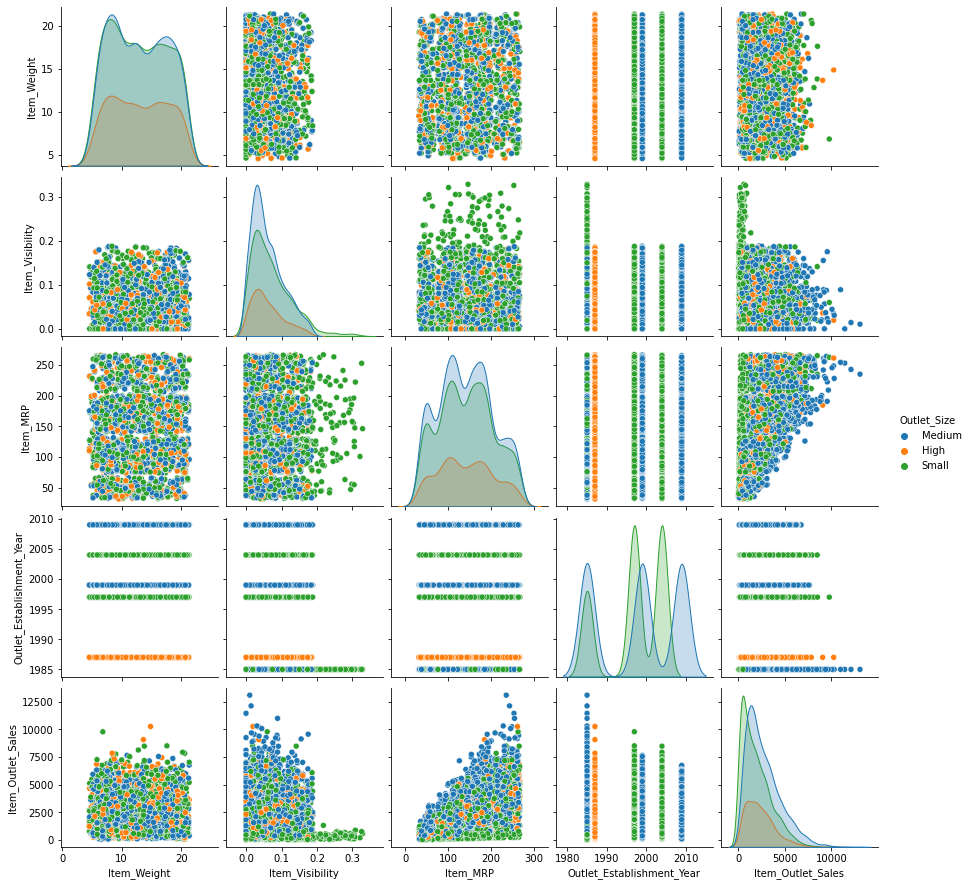

In [27]:
# Scatter plot by 'Outlet_Size'
plt.figure(figsize=(24,24), dpi=250)
sns.pairplot(df, hue='Outlet_Size')

<Figure size 864x864 with 0 Axes>

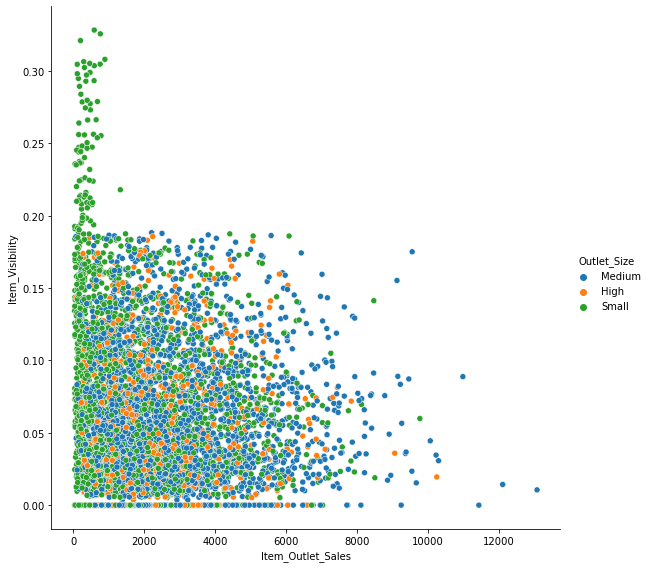

In [28]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df, x_vars='Item_Outlet_Sales', y_vars='Item_Visibility', hue='Outlet_Size', height=8)

<Figure size 864x864 with 0 Axes>

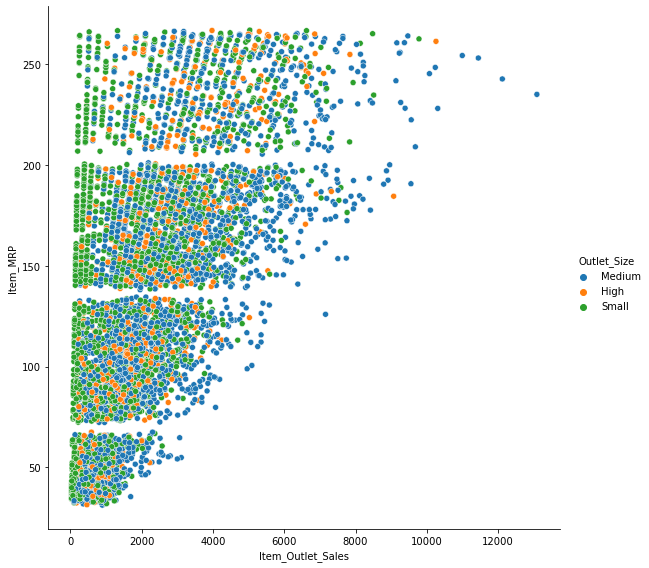

In [29]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df, x_vars='Item_Outlet_Sales', y_vars='Item_MRP', hue='Outlet_Size', height=8)

<Figure size 6000x6000 with 0 Axes>

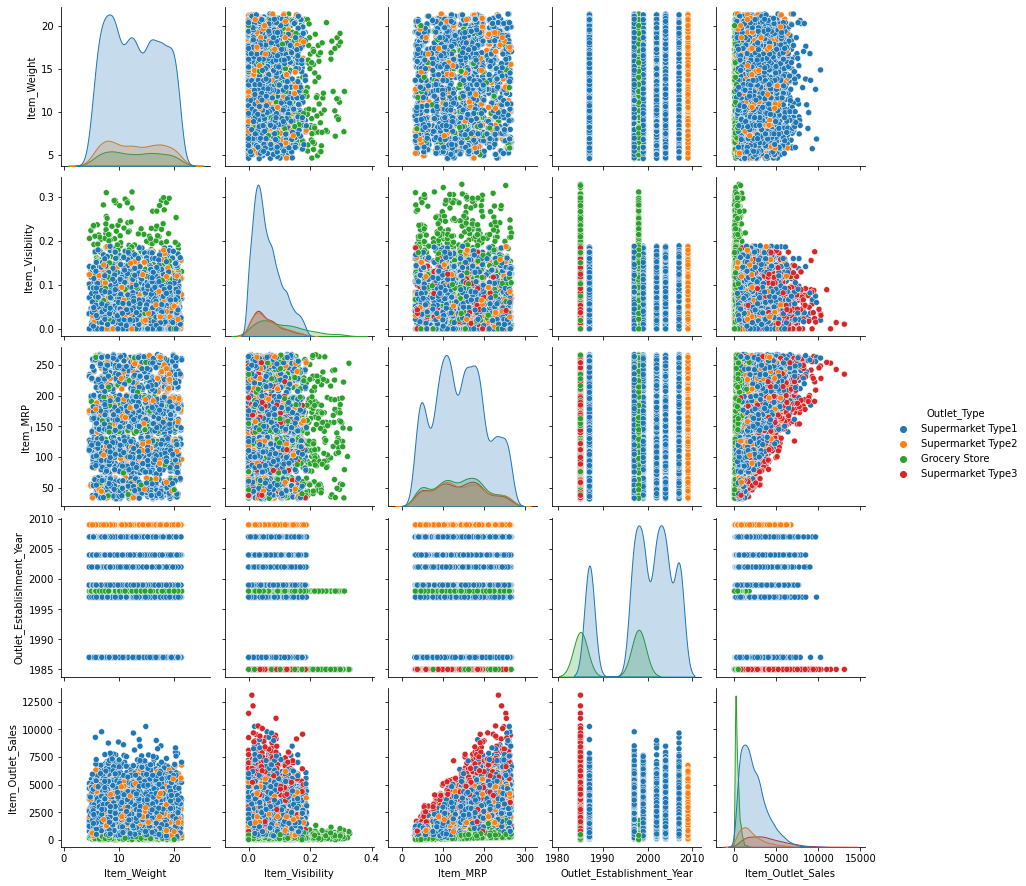

In [30]:
plt.figure(figsize=(24,24), dpi=250)
sns.pairplot(df, hue='Outlet_Type')

### Conclusions - 
- Item Visibility Vs Item Outlet Sales
    - Grocery Stores having very low sales and low MRP Values
- Item_Visibility
    - Supermarket Type1,2,3 having item_visibility less than 0.2
- Item Weight Vs 
    - Item Visibility: Looks no relation between them
- Item_Outlet_Sales Vs
    - Item_Visibility: Small outlets having, very low outlet sales
- Item MRP Vs
    - Item_Outlet_Sales: Item MRP is directly proportional to Item_Outlet_Sales (As price increases, sale increases)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

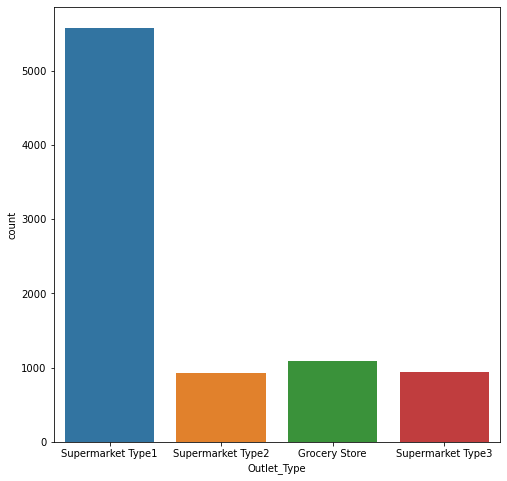

In [31]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Type',data=df)

### Conclusion - 
There are more Supermarket Type1.

Text(0, 0.5, 'Item Outlet Sales')

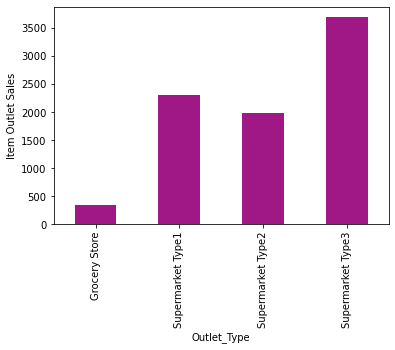

In [254]:
data.groupby("Outlet_Type")['Item_Outlet_Sales'].mean().plot.bar(color=(np.random.random(), np.random.random(), np.random.random()))
plt.ylabel("Item Outlet Sales")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

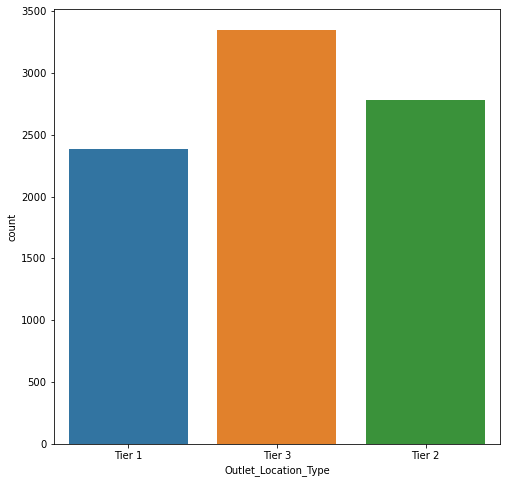

In [32]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Location_Type',data=df)

### Conclusion - 
1. Tier 3 have highest count, then tier 2 and tyee 1

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

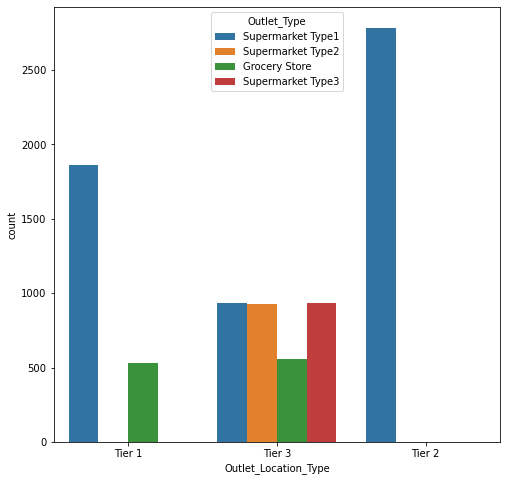

In [33]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Location_Type',data=df, hue='Outlet_Type')

### Conclusion - 
1. Tier 1
    - There are no Supermarket Type2 and Type3
    - Tier 1 locations has, more Supermarket Type1 outlets
    - Tier 1 have around 500 grocery stores
2. Tier 2
    - Tier 2 has only Supermarket Type1 outlers with more than 2500 outlets

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

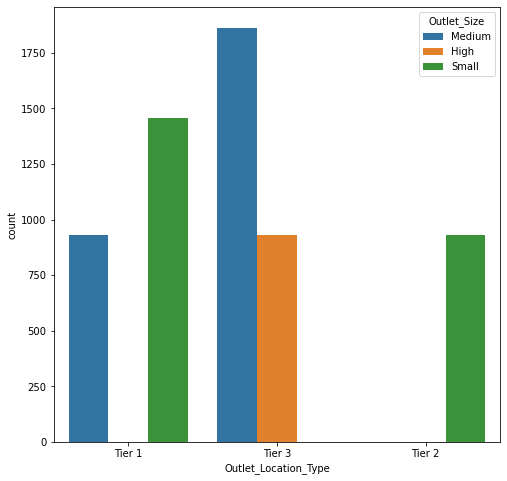

In [34]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Location_Type',data=df, hue='Outlet_Size')

### Conclusion - 
1. Tier 3 having bigger outlet size. No small outlets.
2. Tier 2 Having only small type of outlets
3. Tier 1 has small and medium type od outlets

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

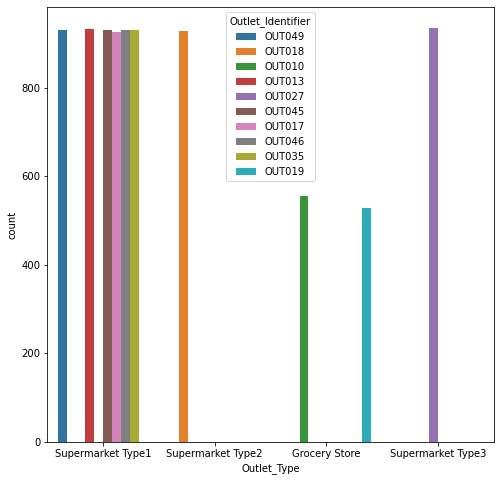

In [36]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Type',data=df, hue='Outlet_Identifier')

### Conclusion - 
There are more supermarket Type 1

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

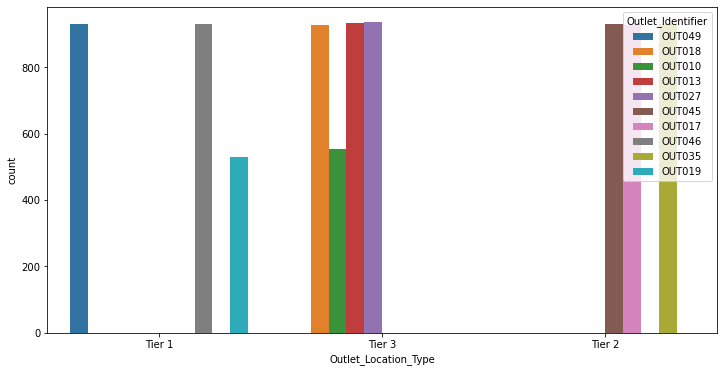

In [37]:
plt.figure(figsize=(12,6))
sns.countplot('Outlet_Location_Type',data=df, hue='Outlet_Identifier')

### Conclusion - 
1. Outlet 19, 46 and 49 belongs to tier 1
2. Outlet 18, 10, 13, 17 belongs to tier 3
3. Outler 45, 17, 35 belongs to tier 2

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

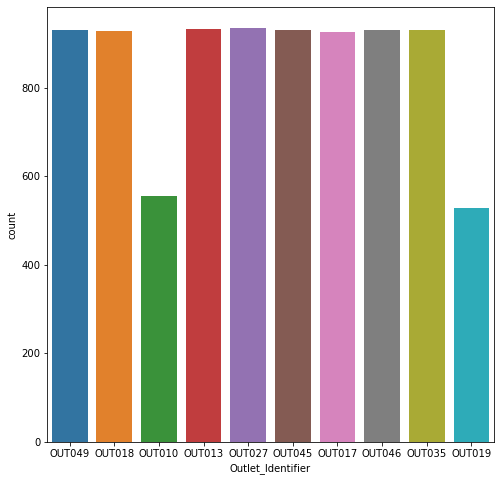

In [38]:
plt.figure(figsize=(8,8))
sns.countplot('Outlet_Identifier',data=df)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

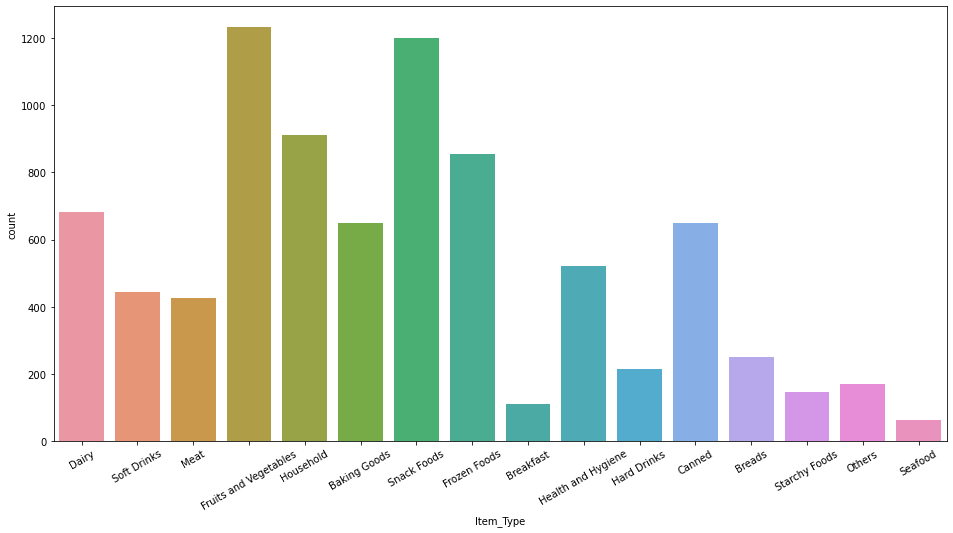

In [39]:
plt.figure(figsize=(16,8))
a = sns.countplot('Item_Type',data=df)
a.set_xticklabels(a.get_xticklabels(),rotation = 30)

### Conclusion - 
1. Consumption of Snack Foods, Fruits, Vegetables, Dairy, Frozen Foods, Canned and Household is more, compared to all other items.
2. Low consumption of breakfast, Seafood, Starchy Foods

Text(0, 0.5, 'Average Item_Outlet_Sales')

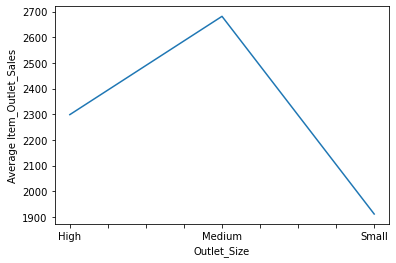

In [214]:
# plt.figure(figsize=(12,6), dpi=100)
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot()
plt.xlabel('Outlet_Size')
plt.ylabel('Average Item_Outlet_Sales')

### Conclusion - 
There is high sale in Medium sized outlet and very low sell in small sized outlet

### Item_Fat_Content countplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

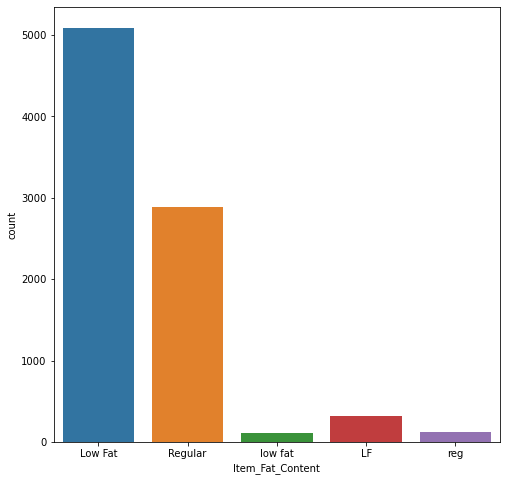

In [41]:
plt.figure(figsize=(8,8))
sns.countplot('Item_Fat_Content',data=df)

In [46]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [47]:
df['Item_Fat_Content']=np.where(df['Item_Fat_Content'] == 'LF','Low Fat',df['Item_Fat_Content'])
df['Item_Fat_Content']=np.where(df['Item_Fat_Content'] == 'low fat','Low Fat',df['Item_Fat_Content'])
df['Item_Fat_Content']=np.where(df['Item_Fat_Content'] == 'reg','Regular',df['Item_Fat_Content'])

In [48]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

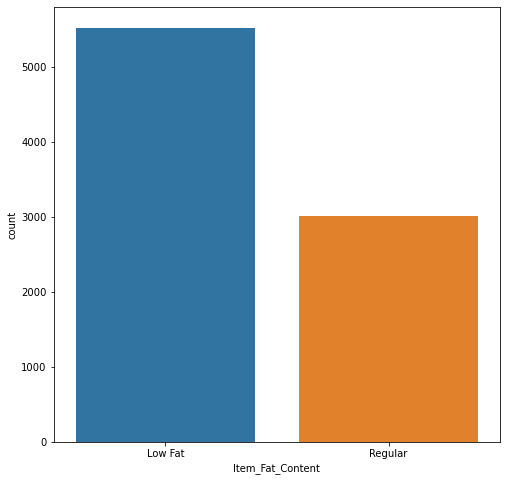

In [49]:
plt.figure(figsize=(8,8))
sns.countplot('Item_Fat_Content',data=df)

### Conclusion - 
1. From above graph, it is clear that there are duplicate values for "Low Fat" as LF, low fat and for "Regular" as reg. So it is better to replace these values with same name.
   - Results obtained before replacement: ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
   - Results obatined after replacemet: ['Low Fat', 'Regular']
2. In Stores, there are more "Low Fat" items.

In [50]:
le = LabelEncoder()

In [51]:
df1 = df.copy()
df1.dropna(inplace=True)
for feature in categorical_features:
    df1[feature]=le.fit_transform(df1[feature])
x1=df1.iloc[:,:-1]  # Dropping last column from data frame
y1=df1.iloc[:,-1]

## Checking Multi Collinearity with Variance Inflation Factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [54]:
calc_vif(x1)

,variables,VIF FACTOR
0,Item_Identifier,1.019357
1,Item_Weight,1.005585
2,Item_Fat_Content,1.042316
3,Item_Visibility,1.005141
4,Item_Type,1.028484
5,Item_MRP,1.003436
6,Outlet_Identifier,62.263565
7,Outlet_Establishment_Year,187.802924
8,Outlet_Size,6.846224
9,Outlet_Location_Type,68.335072


In [55]:
x1.drop('Outlet_Establishment_Year', inplace=True, axis=1)

In [56]:
calc_vif(x1)

,variables,VIF FACTOR
0,Item_Identifier,3.983833
1,Item_Weight,8.339332
2,Item_Fat_Content,1.600071
3,Item_Visibility,2.837550
4,Item_Type,4.000414
5,Item_MRP,6.030664
6,Outlet_Identifier,10.809100
7,Outlet_Size,5.149813
8,Outlet_Location_Type,9.540549
9,Outlet_Type,2.059999


Observations:
From the above after removal of year we can see that the VIF decreases drastically.

<AxesSubplot:>

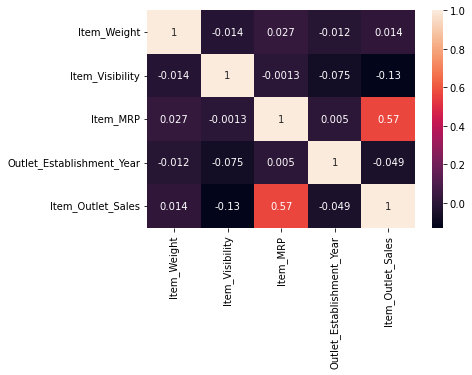

In [59]:
sns.heatmap(df.corr(), annot=True)

### Observation: 
1. Item_visibility and type of products plays important role in Item_order_sale

In [61]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Item_Weight and Item_outlet_Sales should be treated, to remove outliers

Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Identifier            AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Size                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Location_Type            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.529348,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

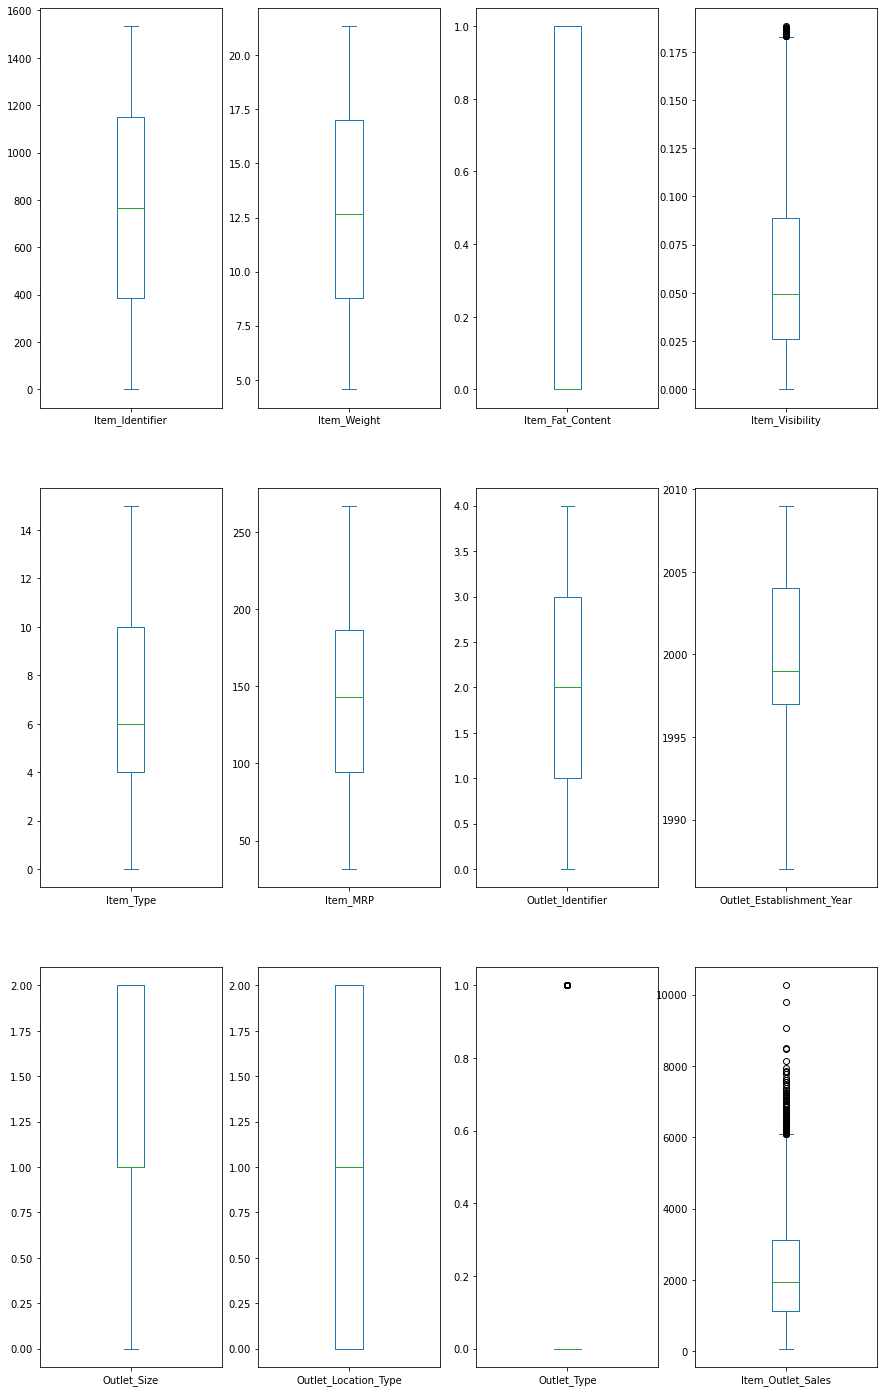

In [78]:
df1.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

In [79]:
z=np.abs(zscore(df1))
z

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.384072,0.770517,0.740227,1.001154,0.765288,1.731874,1.414062,0.025790,0.266543,1.118034,0.499328,0.976831
1,1.714295,1.494212,1.350937,0.928714,1.609163,1.497218,0.706575,1.327755,0.266543,1.118034,2.002692,1.220864
2,0.248649,0.985195,0.740227,0.985173,0.659383,0.001575,1.414062,0.025790,0.266543,1.118034,0.499328,0.116683
4,1.155928,0.849738,0.740227,1.360945,0.421938,1.407620,1.413454,1.650045,1.602132,1.118034,0.499328,0.852804
5,0.036040,0.536065,1.350937,1.360945,1.715069,1.447044,0.706575,1.327755,0.266543,1.118034,2.002692,1.145296
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,0.859335,1.681056,1.350937,0.513570,0.527843,0.594668,0.707183,0.296499,1.069045,1.118034,0.499328,0.892372
8518,0.902309,1.291877,0.740227,0.087824,1.371718,1.166496,1.413454,1.650045,1.602132,1.118034,0.499328,0.338059
8520,1.289374,0.492172,0.740227,0.572045,0.184492,0.906753,0.000304,0.650983,1.069045,0.000000,0.499328,0.720337
8521,0.205675,1.218009,1.350937,1.894998,1.371718,0.618182,0.706575,1.327755,0.266543,1.118034,2.002692,0.284710


In [80]:
threshold=3
print(np.where(z>3))

(array([  28,   77,  143,  189,  207,  402,  489,  663,  796,  885, 1358,
       1452, 1515, 1677, 1683, 1686, 1864, 1912, 2131, 2274, 2355, 2362,
       2451, 2676, 2735, 3140, 3269, 3507, 3604, 3709, 3893, 4129, 4324,
       4346, 4498, 4556, 4639], dtype=int64), array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11], dtype=int64))


In [83]:
z.iloc[11,11]

0.48385399781396543

In [84]:
z.shape

(4650, 12)

In [85]:
len(np.where(z>3)[0])

37

In [87]:
# removing outliers
df_new=df1[(z<3).all(axis=1)]
print("Old Dataframe",df1.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df1.shape[0] - df_new.shape[0])

Old Dataframe (4650, 12)
New Dataframe (4613, 12)
total_dropped_rows 37


# Percentage Data Loss

In [216]:
loss_percent=(4650-4613)/4650*100
print(loss_percent,'%')

0.7956989247311829 %


In [217]:
df_new.skew()

Item_Identifier             -0.012539
Item_Weight                  0.070973
Item_Fat_Content             0.609821
Item_Visibility              0.768963
Item_Type                    0.111353
Item_MRP                     0.137683
Outlet_Identifier            0.001917
Outlet_Establishment_Year   -0.384787
Outlet_Size                 -0.342351
Outlet_Location_Type        -0.002122
Outlet_Type                  1.493054
Item_Outlet_Sales            0.832566
dtype: float64

### Observation: The skewness of data is within limit +- 0.5

After removing, outlier, we can see, there is less skewness in data

Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Identifier            AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Size                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Location_Type            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.529348,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

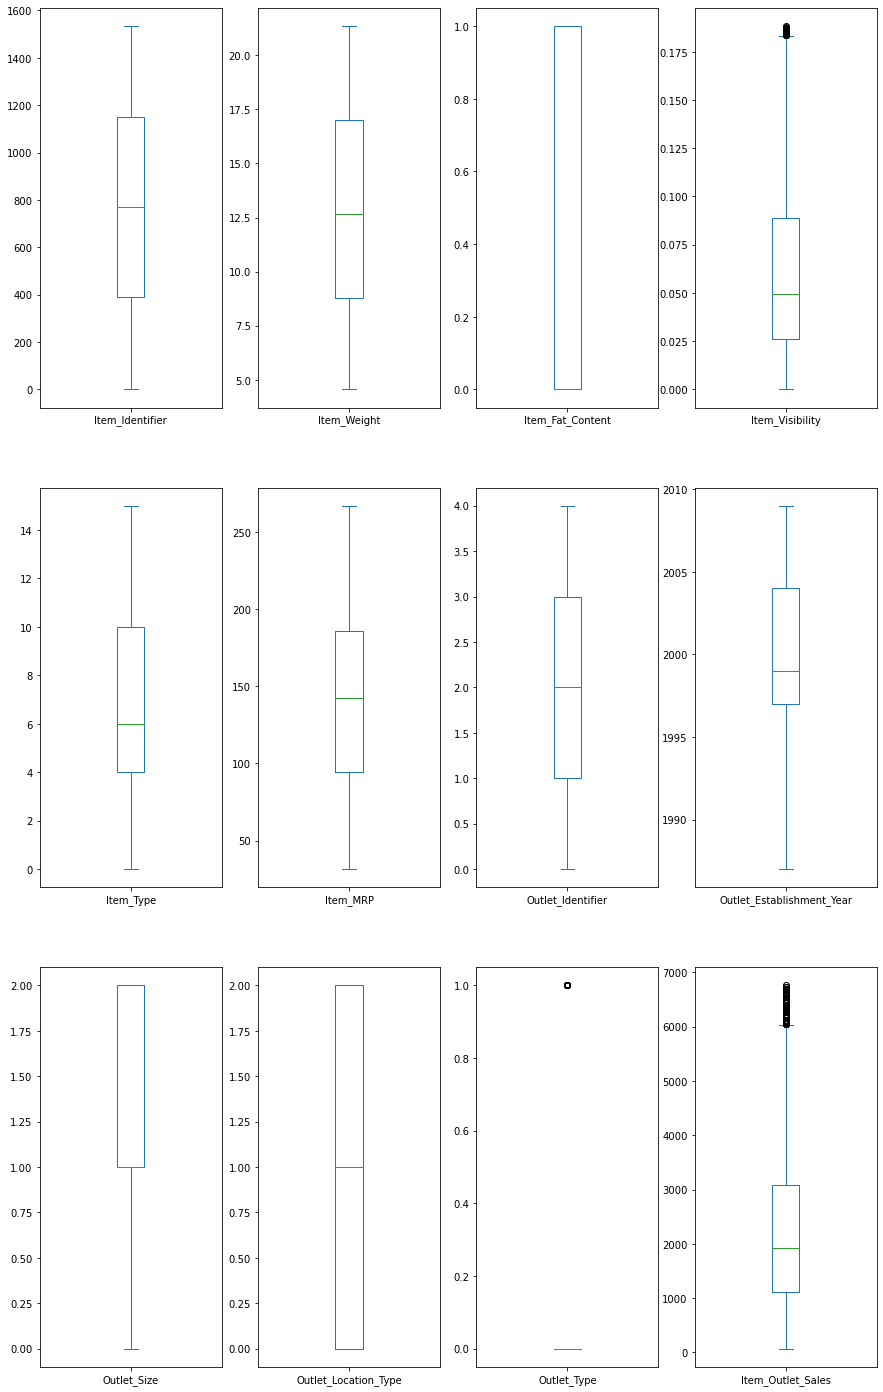

In [213]:
df_new.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## Splitting the data set

In [90]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [91]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,154,9.300,0,0.016047,4,249.8092,4,1999,1,0,0
1,8,5.920,1,0.019278,14,48.2692,1,2009,1,2,1
2,656,17.500,0,0.016760,10,141.6180,4,1999,1,0,0
4,1277,8.930,0,0.000000,9,53.8614,0,1987,0,2,0
5,750,10.395,1,0.000000,0,51.4008,1,2009,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8517,386,20.750,1,0.083607,5,178.8318,3,1997,2,0,0
8518,367,6.865,0,0.056783,13,214.5218,0,1987,0,2,0
8520,1336,10.600,0,0.035186,8,85.1224,2,2004,2,1,0
8521,675,7.210,1,0.145221,13,103.1332,1,2009,1,2,1


In [92]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4613, dtype: float64

In [93]:
X.skew().sort_values()

Outlet_Establishment_Year   -0.384787
Outlet_Size                 -0.342351
Item_Identifier             -0.012539
Outlet_Location_Type        -0.002122
Outlet_Identifier            0.001917
Item_Weight                  0.070973
Item_Type                    0.111353
Item_MRP                     0.137683
Item_Fat_Content             0.609821
Item_Visibility              0.768963
Outlet_Type                  1.493054
dtype: float64

### Observations:

Since the skewness is almost within permissible ranges and the outlier data are a real value we have proceeded with the X independant variables as it

# Scaling the independant variable (x) to get all the columns in a standard scale¶

In [96]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[-1.38548704e+00, -7.71430070e-01, -7.40612051e-01, ...,
        -2.66650627e-01, -1.11885258e+00, -5.01489913e-01],
       [-1.71586042e+00, -1.49508578e+00,  1.35023458e+00, ...,
        -2.66650627e-01,  1.11642977e+00,  1.99405806e+00],
       [-2.49545707e-01,  9.84184367e-01, -7.40612051e-01, ...,
        -2.66650627e-01, -1.11885258e+00, -5.01489913e-01],
       ...,
       [ 1.28917960e+00, -4.93100952e-01, -7.40612051e-01, ...,
         1.07037040e+00, -1.21140383e-03, -5.01489913e-01],
       [-2.06551912e-01, -1.21889765e+00,  1.35023458e+00, ...,
        -2.66650627e-01,  1.11642977e+00,  1.99405806e+00],
       [-1.62308433e+00,  4.06116199e-01, -7.40612051e-01, ...,
         1.07037040e+00, -1.11885258e+00, -5.01489913e-01]])

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have been standardized.

In [97]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [98]:
x = pd.DataFrame(x1,columns=X.columns)

# Data is ready for Machine Learning Models

Since the y (Target) has continuous values we will use Linear Regression model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Finding Best Random State

In [218]:
lr = LinearRegression()

In [219]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [224]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [225]:
lr_acc = pd.DataFrame()

In [226]:
lr_acc['random_state'] = random_state[:198]
lr_acc['training_accuracy'] = training_accuracy[:198]
lr_acc['testing_accuracy'] = testing_accuracy[:198]

In [227]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
96,97,0.45,0.51


### It is clear that for random state 97, we have highest testing accuracy

# Using all models for Prediction

In [228]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Tuning parameter for better results¶

### Linear Regression

In [229]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1021.9169968566046
R2 Score is: 51.09242461691294
Cross Validation Score is: 46.77162040250641
R2 Score - Cross Validation Score is 4.320804214406536


### L1 -- Lasso Regression

In [230]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1021.9170744724107
R2 Score is: 51.09241718773612
Cross Validation Score is: 46.77162183809919
R2 Score - Cross Validation Score is 4.320795349636924


### L2 -- Ridge Regression¶

In [231]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1021.9170002005758
R2 Score is: 51.092424296837
Cross Validation Score is: 46.7716204219498
R2 Score - Cross Validation Score is 4.320803874887204


### Elastic Net

In [232]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1021.9231647639187
R2 Score is: 51.091834239605994
Cross Validation Score is: 46.77165512232498
R2 Score - Cross Validation Score is 4.320179117281015


#### Elastic Net Parameter Tuning

In [246]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

In [244]:
ratios = np.arange(0, 1, 0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]

In [247]:
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)

In [248]:
model.fit(x, y)

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             l1_ratio=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
             n_jobs=-1)

In [249]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 0.100000
l1_ratio_: 0.970000


### Extra Trees Regressor

In [233]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 1082.6391581866644
R2 Score is: 45.10758347004275
Cross Validation Score is: 41.27113751083386
R2 Score - Cross Validation Score is 3.8364459592088878


### Random Forest Regressor

In [234]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1086.7384301854452
R2 Score is: 44.69111054502339
Cross Validation Score is: 39.52194035521266
R2 Score - Cross Validation Score is 5.169170189810735


### K Neighbors Regressor

In [236]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1146.3760224382356
R2 Score is: 38.45410727722911
Cross Validation Score is: 32.00041500656983
R2 Score - Cross Validation Score is 6.453692270659282


### SGD Regressor¶

In [237]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 1094.386986659089
R2 Score is: 43.90983360809888
Cross Validation Score is: 37.67726719067011
R2 Score - Cross Validation Score is 6.232566417428771


### Gradient Boosting Regressor¶

In [238]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1043.4248740543323
R2 Score is: 49.0120843003497
Cross Validation Score is: 44.88055777414976
R2 Score - Cross Validation Score is 4.131526526199941


### Ada Boost Regressor

In [239]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 1044.0043794463043
R2 Score is: 48.95543244539857
Cross Validation Score is: 44.7098013736045
R2 Score - Cross Validation Score is 4.245631071794072


### Extra Trees Regressor

In [240]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 1075.587304829405
R2 Score is: 45.820346513925614
Cross Validation Score is: 41.243349503647735
R2 Score - Cross Validation Score is 4.5769970102778785


# Hyper parameter tuning

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

## For Lasso

In [207]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1


cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


0.4594193500102601

# For Gradient Boosting

In [208]:
clf_gb=GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [500]})

In [209]:
clf_gb.best_score_

0.3846238171527311

In [210]:
clf_gb.best_params_

{'n_estimators': 500}

In [211]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.541428,0.046212,0.001493,0.002791,500,{'n_estimators': 500},0.432088,0.368392,0.398784,0.316088,0.404413,0.353992,0.479202,0.340308,0.349681,0.40329,0.384624,0.046068,1


# Consumption of Snack Foods, Fruits, Vegetables, Dairy, Frozen Foods, Canned and Household is more, compared to all other items.

# Out of all models, Elastic Net Parameter is performing well with ~51% Accuracy.
After Hyper Parameter Tuning, below values are considered for Regression
alpha: 0.100000
l1_ratio_: 0.970000

# Consumption of Snack Foods, Fruits, Vegetables, Dairy, Frozen Foods, Canned and Household is more, compared to all other items, if we increase visibility of these items, we can increase sales
# Low consumption of breakfast, Seafood, Starchy Foods, So we need less visibility for these items